## Plotting for a range of tasks with different topologies

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["text.usetex"] = True # make sure you have latex installed


df_erdos = pd.read_csv("../data/plotting/task_erdos_seed.csv")
df_erdossparse = pd.read_csv("../data/plotting/task_erdossparse_seed.csv")
df_sbm = pd.read_csv("../data/plotting/task_sbm_seed.csv")
df_sbmsparse = pd.read_csv("../data/plotting/task_sbmsparse_seed.csv")
df_gridgraph = pd.read_csv("../data/plotting/task_gridgraph_seed.csv")
df_ba = pd.read_csv("../data/plotting/task_ba_seed.csv")

all_df = [df_erdos, df_erdossparse, df_sbm, df_sbmsparse, df_gridgraph, df_ba]

## Showing that topology impacts graph (Figure 2)

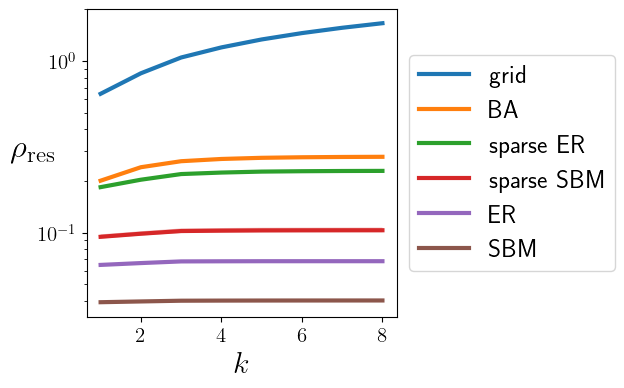

In [58]:
# Assuming the dataframes are already loaded as shown in the question
# df_erdos, df_erdossparse, df_sbm, df_sbmsparse, df_gridgraph

all_df = [
    (df_gridgraph, "Dataset.gridgraph"),
    (df_ba, "Dataset.ba"),
    (df_erdossparse, "Dataset.erdossparse"),
    (df_sbmsparse, "Dataset.sbmsparse"),
    (df_erdos, "Dataset.erdos"),
    (df_sbm, "Dataset.sbm"),
]

plt.figure(figsize=(4, 4))

dic_map = {
    "gridgraph": "grid",
    "ba": "BA",
    "erdossparse": "sparse ER",
    "sbmsparse": "sparse SBM",
    "erdos": "ER",
    "sbm": "SBM",         
}

for df, dataset_name in all_df:
    # Extract distance_fn number from the 'distance_fn' column
    df['distance_fn_number'] = df['distance_fn'].str.extract(r'(\d+)$').astype(int)

    # Group by distance_fn_number to compute min, max, and mean for each group
    grouped = df.groupby('distance_fn_number')
    mean_values = grouped['Train/TaskRange'].mean()
    min_values = grouped['Train/TaskRange'].min()
    max_values = grouped['Train/TaskRange'].max()

    # Plot the mean curve
    plt.plot(
        mean_values.index,  # x-axis: distance_fn_number
        mean_values,        # y-axis: mean Test/TaskRange
        label=dic_map[dataset_name.replace("Dataset.", "")],
        linewidth=3,
    )

    # Add a shaded region for the min-max range
    plt.fill_between(
        mean_values.index,
        min_values,
        max_values,
        alpha=0.3
    )

# Add labels, title, and legend
plt.xlabel('$k$', fontsize=22)
plt.ylabel("$\\rho_\\mathrm{res}$", fontsize=24, rotation=0)  
# plt.ylabel('Task Range', fontsize=18)

plt.yscale('log')
# plt.xscale('log')
plt.legend(fontsize=18, loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig("../plots/task_range_mean_min_max_seed.pdf", bbox_inches='tight')

# Display the plot
plt.show()


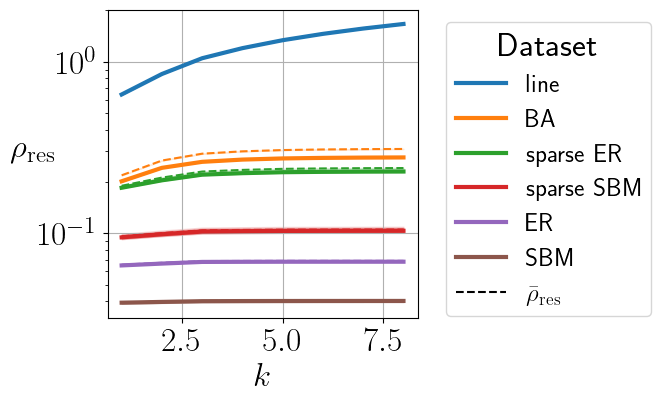

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataframes are already loaded as shown in the question
# df_erdos, df_erdossparse, df_sbm, df_sbmsparse, df_gridgraph, df_ba

all_df = [
    (df_gridgraph, "Dataset.gridgraph"),
    (df_ba, "Dataset.ba"),
    (df_erdossparse, "Dataset.erdossparse"),
    (df_sbmsparse, "Dataset.sbmsparse"),
    (df_erdos, "Dataset.erdos"),
    (df_sbm, "Dataset.sbm"),
]

plt.figure(figsize=(4, 4))

dic_map = {
    "gridgraph": "line",
    "ba": "BA",
    "erdossparse": "sparse ER",
    "sbmsparse": "sparse SBM",
    "erdos": "ER",
    "sbm": "SBM",         
}

# Define line styles and a color palette
color_palette = sns.color_palette("tab10", len(all_df))
line_styles = ['-', '--']  # Solid for Train/TaskRange, Dashed for Train/TaskRangeNorm

# Boolean flag to ensure a single label for dashed line texture
normalized_label_added = False

for i, (df, dataset_name) in enumerate(all_df):
    # Extract distance_fn number from the 'distance_fn' column
    df['distance_fn_number'] = df['distance_fn'].str.extract(r'(\d+)$').astype(int)

    # Plot Train/TaskRange
    grouped = df.groupby('distance_fn_number')
    mean_values = grouped['Train/TaskRange'].mean()
    min_values = grouped['Train/TaskRange'].min()
    max_values = grouped['Train/TaskRange'].max()

    plt.plot(
        mean_values.index,  # x-axis: distance_fn_number
        mean_values,        # y-axis: mean Train/TaskRange
        color=color_palette[i],
        linestyle=line_styles[0],
        label=dic_map[dataset_name.replace("Dataset.", "")],
        linewidth=3,
    )

    plt.fill_between(
        mean_values.index,
        min_values,
        max_values,
        color=color_palette[i],
        alpha=0.3
    )

    # Plot Train/TaskRangeNorm
    mean_values = grouped['Train/TaskRangeNorm'].mean()
    min_values = grouped['Train/TaskRangeNorm'].min()
    max_values = grouped['Train/TaskRangeNorm'].max()

    plt.plot(
        mean_values.index,  # x-axis: distance_fn_number
        mean_values,        # y-axis: mean Train/TaskRangeNorm
        color=color_palette[i],
        linestyle=line_styles[1],  # Dashed line for Train/TaskRangeNorm
        label="_nolegend_"  # Avoid adding duplicate legend entries
    )

    plt.fill_between(
        mean_values.index,
        min_values,
        max_values,
        color=color_palette[i],
        alpha=0.15  # Lighter shading for Train/TaskRangeNorm
    )

# Add a single label for the dashed line texture
# if normalized_label_added:
plt.plot([], [], color='black', linestyle=line_styles[1], label="$\\bar{\\rho}_\mathrm{res}$")
    # normalized_label_added = True

# Add labels, title, and legend
plt.xlabel('$k$', fontsize=24)
plt.ylabel("$\\rho_\\mathrm{res}$", fontsize=24, rotation=0) 
plt.yscale('log')

# Move the legend outside the plot
plt.legend(title="Dataset", fontsize=18, title_fontsize=24, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=24)

# Save the plot
plt.savefig("../plots/task_both_range_mean_min_max_seed.pdf", bbox_inches='tight')

# Display the plot
plt.show()


## Showing that task impacts range (Figure 3)
### Three tasks: range as function of $k$

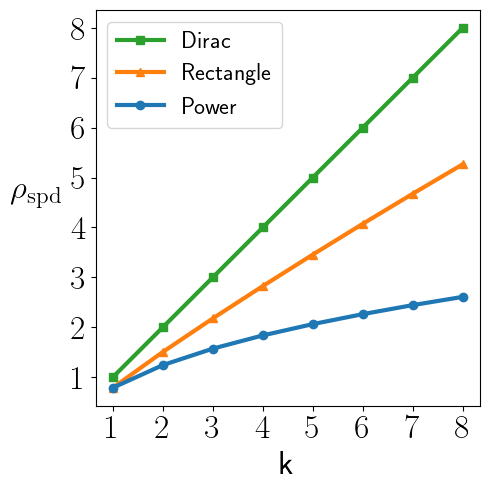

In [60]:
df_dirac = pd.read_csv("../data/plotting/grid_task_range_dirac.csv")
df_rectangle = pd.read_csv("../data/plotting/grid_task_range_rectangle.csv")
df_power = pd.read_csv("../data/plotting/grid_task_range_power.csv")

# Create a plot
plt.figure(figsize=(5, 5))

# Plot Val/TaskRangeSPD for df_dirac
plt.plot(list(df_dirac['k']), df_dirac['Val/TaskRangeSPD'], label='Dirac', color='tab:green', marker='s', linewidth=3)

# Plot Val/TaskRangeSPD for df_rectangle
plt.plot(list(df_rectangle['k']), list(df_rectangle['Val/TaskRangeSPD']), label='Rectangle', color='tab:orange', marker='^', linewidth=3)

# Plot Val/TaskRangeSPD for df_power
plt.plot(list(df_power['k']), df_power['Val/TaskRangeSPD'], label='Power', color='tab:blue', marker='o', linewidth=3)

# Customize the plot
# plt.title('Val/TaskRangeSPD for Different Tables')
plt.xlabel('k', fontsize=24)
plt.ylabel('$\\rho_{\\mathrm{spd}}$', fontsize=24, rotation=0, labelpad=25)
plt.legend(fontsize=17)
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)

# tight
plt.tight_layout()
# make sure legend not cut off

# Display the plot
plt.grid(False)
plt.savefig("../plots/3tasks_grid.pdf")
plt.show()

# Synthetic node-level (Figure 4)

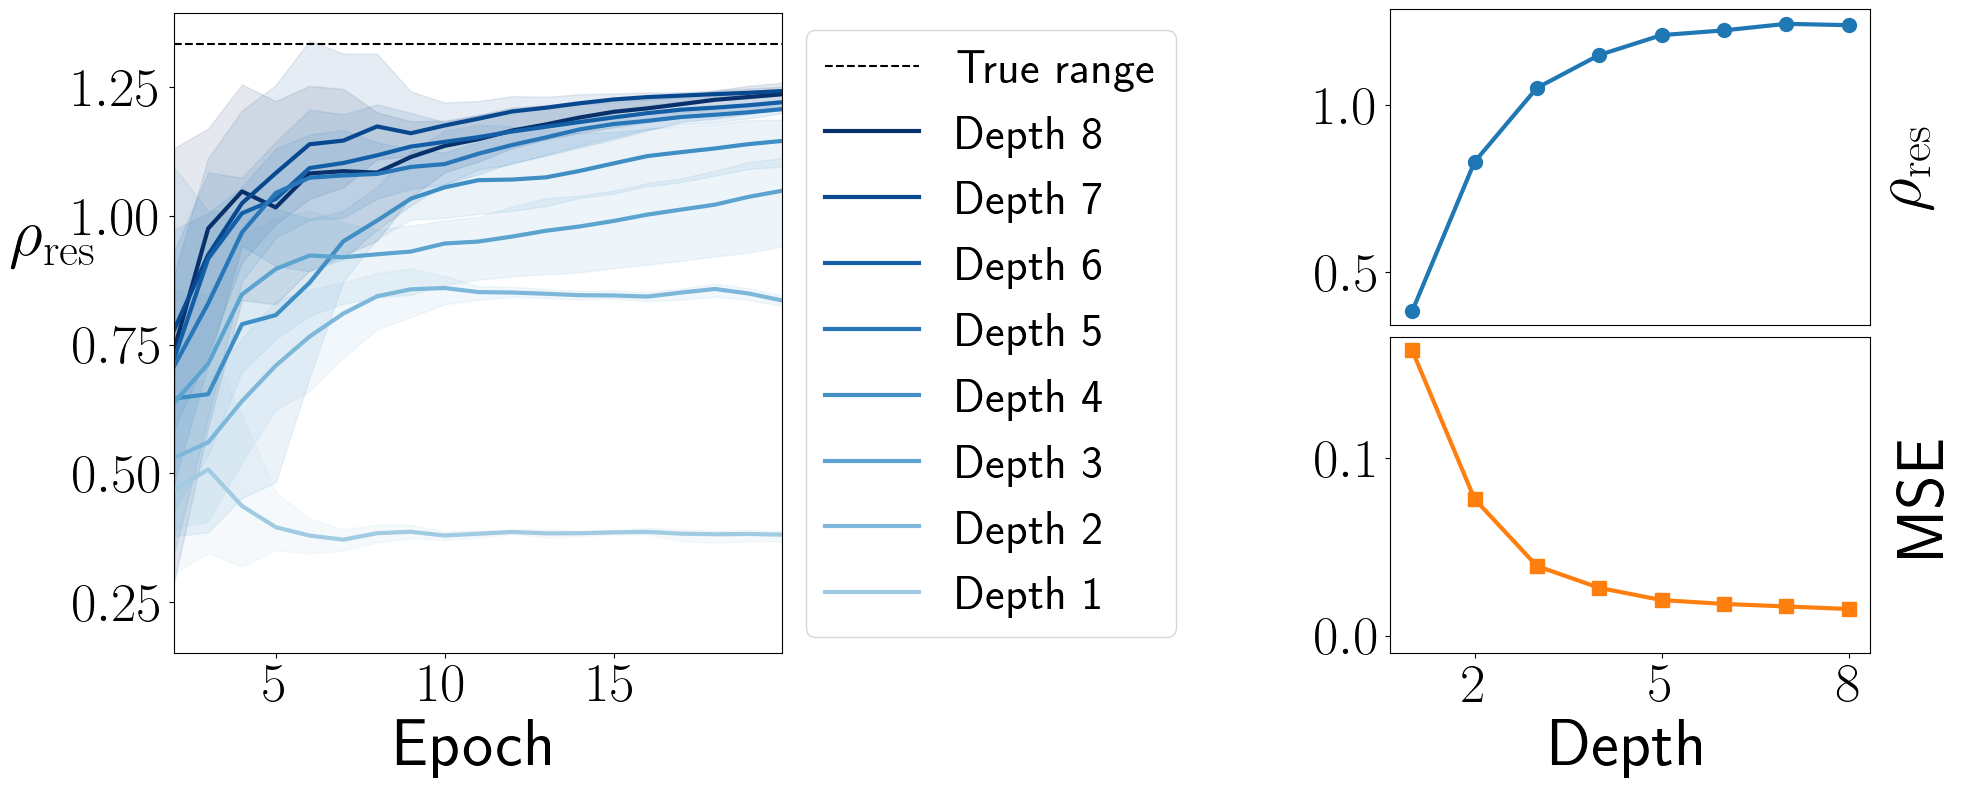

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fontsize = 48
labelsize = 40
linewidth = 3  # Increased linewidth for all plots
markersize = 10  # Increase the marker size for visibility

# First part - Loading and processing grid_data.csv
df = pd.read_csv("../data/plotting/grid_data.csv")

# Group by 'Name' and aggregate mean and std for 'Test/Range' and 'Test/MetricType.MSE_MAE'
aggregated_df = df.groupby('Name').agg(
    Test_Range_mean=('Test/Range', 'mean'),
    Test_Range_std=('Test/Range', 'std'),
    Test_MSE_mean=('Test/MetricType.MSE_MAE', 'mean'),
    Test_MSE_std=('Test/MetricType.MSE_MAE', 'std')
).reset_index()

# Extract the number of layers from the 'Name' column
aggregated_df['Layers'] = aggregated_df['Name'].str.extract(r'(\d+)$').astype(int)

# Remove the row with 'task_Range' since it does not correspond to a model
aggregated_df = aggregated_df[aggregated_df['Name'] != 'task_Range']

# Second part - Loading and processing grid_range_evol_smoothed.csv
df_smoothed = pd.read_csv("../data/plotting/grid_range_evol_smoothed.csv")
df_min_max_smoothed = df_smoothed.copy()  # To hold smoothed min/max values

# Apply moving average with window size 2 to each model type (1 to 8)
for i in range(1, 9):
    column_name = f'ModelType.GCN.{i}'
    min_column_name = f'{column_name}__MIN'
    max_column_name = f'{column_name}__MAX'
    
    # Apply moving average for the main column, min and max columns
    df_smoothed[column_name] = df_smoothed[column_name].rolling(window=2).mean()
    df_min_max_smoothed[min_column_name] = df_min_max_smoothed[min_column_name].rolling(window=2).mean()
    df_min_max_smoothed[max_column_name] = df_min_max_smoothed[max_column_name].rolling(window=2).mean()

# Create the figure with a grid layout (1 row, 2 columns)
fig = plt.figure(figsize=(16, 8))  # Adjusted the figure size for better use of space

# --- First Plot (Larger Plot on the Left) ---
# Adding a horizontal dotted line at value 1.33437 with label 'True range'
ax1 = fig.add_axes([0.05, 0.1, 0.38, 0.8])  # Left plot positioned manually (widened)

ax1.axhline(y=1.33437, color='black', linestyle='--', label='True range')  # True range in black

# Define the colormap (a gradient of blues) and flip it
cmap = plt.cm.Blues_r  # The _r suffix flips the colormap
norm = plt.Normalize(vmin=1, vmax=12)  # Normalize to match the 8 layers
colors = [cmap(norm(i)) for i in range(1, 9)]  # Get a color for each model

# Plot the smoothed data for each model type (1 to 8)
for i, color in zip(range(1, 9), colors):
    i = 9 - i  # Reverse the depth to match the desired order (8 to 1)
    
    column_name = f'ModelType.GCN.{i}'
    min_column_name = f'{column_name}__MIN'
    max_column_name = f'{column_name}__MAX'
    
    # Plot the smoothed data: x-axis = Step, y-axis = smoothed values for current model type
    ax1.plot(df_smoothed['Step'], df_smoothed[column_name], label=f'Depth {i}', color=color, linewidth=linewidth)

    # Plot the shaded region between min and max values (smoothed)
    ax1.fill_between(df_smoothed['Step'], 
                     df_min_max_smoothed[min_column_name], 
                     df_min_max_smoothed[max_column_name], 
                     color=color, alpha=0.1)

# Adding labels and title
ax1.set_xlabel('Epoch', fontsize=fontsize)
ax1.set_ylabel('$\\rho_{\\mathrm{res}}$', fontsize=fontsize, rotation=0) 
ax1.yaxis.set_label_coords(-0.2, 0.6)

# Create a list of handles and labels for the legend
handles, labels = ax1.get_legend_handles_labels()

# # Move the 'True range' label to the end
# # Find the 'True range' handle and remove it from the list
# true_range_handle = handles.pop(labels.index('True range'))
# true_range_label = labels.pop(labels.index('True range'))

# # Append the 'True range' to the end of the legend list
# handles.append(true_range_handle)
# labels.append(true_range_label)

# Create the legend with the new order
ax1.legend(handles=handles, labels=labels, fontsize=labelsize-6, ncol=1, loc="center left", bbox_to_anchor=(1., 0.5))

ax1.tick_params(axis='both', which='major', labelsize=labelsize)
ax1.set_xlim(left=2, right=20)  # Adjusting x-axis limits
ax1.set_ylim(bottom=0.15)
ax1.set_xticks([5, 10, 15])


# --- Second Plot (Stacked Vertically on the Right) ---
# Adjust the position and size of the right-hand side plots (make them narrower)
ax2 = fig.add_axes([0.81, 0.51, 0.3, 0.395])  # Right top subplot (narrower)
ax3 = fig.add_axes([0.81, 0.1, 0.3, 0.395])   # Right bottom subplot (narrower)

# Plot Test_Range_mean vs Layers on the first subplot (Range)
ax2.plot(aggregated_df['Layers'], aggregated_df['Test_Range_mean'], marker='o', color='tab:blue', linewidth=linewidth, markersize=markersize)
ax2.set_ylabel('$\\rho_\\mathrm{res}$', fontsize=fontsize) 
ax2.tick_params(axis='both', which='major', labelsize=labelsize)
ax2.yaxis.set_label_position("right") 

# Remove x-ticks for the top right plot (ax2)
ax2.set_xticks([])

# Plot Test_MSE_mean vs Layers on the second subplot (MSE)
ax3.plot(aggregated_df['Layers'], aggregated_df['Test_MSE_mean'], marker='s', color='tab:orange', linewidth=linewidth, markersize=markersize)
ax3.set_xlabel('Depth', fontsize=fontsize)
ax3.set_ylabel('MSE', fontsize=fontsize, labelpad=20)
ax3.tick_params(axis='both', which='major', labelsize=labelsize)
ax3.set_xticks([2, 5, 8])
ax3.set_yticks([0.0, 0.1])
ax3.set_ylim(bottom=-0.01)
ax3.yaxis.set_label_position("right") 

# Remove the grid
ax2.grid(False)
ax3.grid(False)

# Save the plot, ensuring no part is cut off
plt.savefig("../plots/line_all_synthetic.pdf", bbox_inches='tight')

# Display the plots
plt.show()


## Graph-level synthetic (Figure 5)

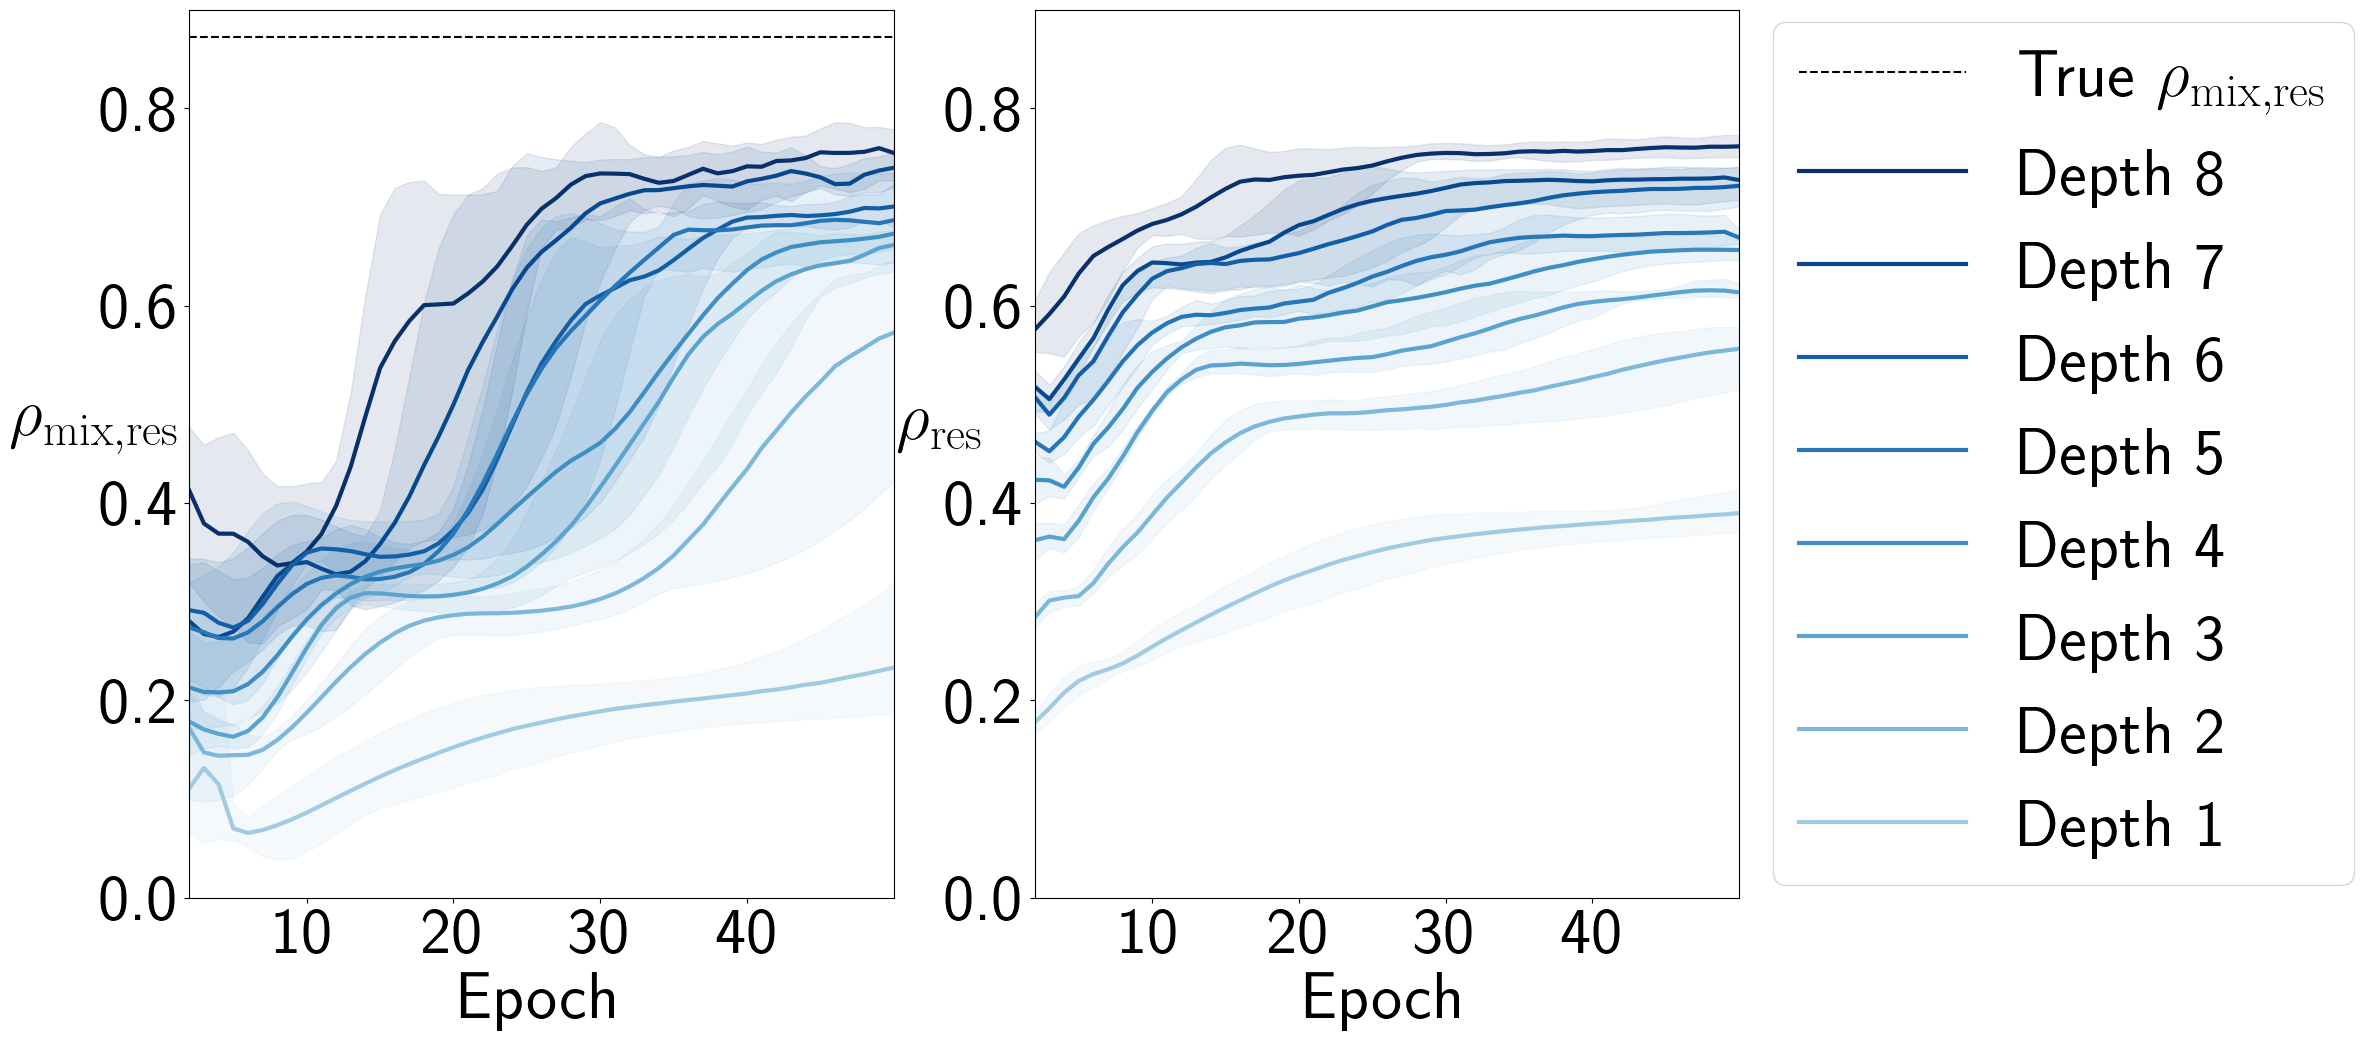

In [62]:
# Setup for the plot's appearance
fontsize = 48
labelsize = 40
linewidth = 4  # Increased linewidth for all plots
markersize = 10  # Increase the marker size for visibility

# Load the data for the first plot
df1 = pd.read_csv("../data/plotting/grid_graph_range_evol.csv")

# Apply moving average with window size 2 to each model type (1 to 8)
df1_smoothed = df1.copy()  # Create a copy of the DataFrame to keep the original data intact
df1_min_max_smoothed = df1.copy()  # To hold smoothed min/max values

for i in range(1, 9):
    column_name = f'num_layers: {i} - Test/RangeResNorm'
    min_column_name = f'{column_name}__MIN'
    max_column_name = f'{column_name}__MAX'
    
    # Apply moving average with window size 2 for the main column, min and max columns
    df1_smoothed[column_name] = df1[column_name].rolling(window=2).mean()
    df1_min_max_smoothed[min_column_name] = df1[min_column_name].rolling(window=2).mean()
    df1_min_max_smoothed[max_column_name] = df1[max_column_name].rolling(window=2).mean()

# Load the data for the second plot
df2 = pd.read_csv("../data/plotting/grid_graph_range_evol_final_jac.csv")

# Apply moving average with window size 2 to each model type (1 to 8)
df2_smoothed = df2.copy()  # Create a copy of the DataFrame to keep the original data intact
df2_min_max_smoothed = df2.copy()  # To hold smoothed min/max values

for i in range(1, 9):
    column_name = f'num_layers: {i} - Test/RangeResNorm'
    min_column_name = f'{column_name}__MIN'
    max_column_name = f'{column_name}__MAX'
    
    # Apply moving average with window size 2 for the main column, min and max columns
    df2_smoothed[column_name] = df2[column_name].rolling(window=2).mean()
    df2_min_max_smoothed[min_column_name] = df2[min_column_name].rolling(window=2).mean()
    df2_min_max_smoothed[max_column_name] = df2[max_column_name].rolling(window=2).mean()

# Create a figure with two subplots side by side (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))  # Two columns, one row

# Adjust the space between plots and legend
fig.subplots_adjust(hspace=0.3, top=0.85)  # Move the legend higher, adjust top spacing

# Define the colormap (a gradient of blues) and flip it
cmap = plt.cm.Blues_r  # The _r suffix flips the colormap
norm = plt.Normalize(vmin=1, vmax=12)  # Normalize to match the 8 layers
colors = [cmap(norm(i)) for i in range(1, 9)]  # Get a color for each model
ax1.axhline(y=0.8725, color='black', linestyle='--', label='True $\\rho_\\mathrm{mix, res}$')  


# Plot the first dataset on ax1 (with Depth-i legends)
for i, color in zip(range(1, 9), colors):
    i = 9-i
    column_name = f'num_layers: {i} - Test/RangeResNorm'
    min_column_name = f'{column_name}__MIN'
    max_column_name = f'{column_name}__MAX'
    
    ax1.plot(df1_smoothed['Step'], df1_smoothed[column_name], color=color, linewidth=3, label=f'Depth {i}')
    ax1.fill_between(df1_smoothed['Step'], 
                     df1_min_max_smoothed[min_column_name], 
                     df1_min_max_smoothed[max_column_name], 
                     color=color, 
                     alpha=0.1)

ax1.set_ylabel('$\\rho_\\mathrm{mix, res}$', fontsize=fontsize, rotation=0)  # mixing 
ax1.set_xlabel('Epoch', fontsize=fontsize)
ax1.set_xticks([10, 20, 30, 40])
ax1.set_xticklabels([10, 20, 30, 40], fontsize=fontsize)
# Round y-ticks for ax1
ax1.set_yticks(ax1.get_yticks())  # Get current yticks
ax1.set_yticklabels([f'{tick:.1f}' for tick in ax1.get_yticks()], fontsize=fontsize)
ax1.set_xlim(left=2, right=50)
ax1.set_ylim(bottom=0.00, top=0.9)

# Plot the second dataset on ax2 (with only the True range legend)
for i, color in zip(range(1, 9), colors):
    i = 9-i
    column_name = f'num_layers: {i} - Test/RangeResNorm'
    min_column_name = f'{column_name}__MIN'
    max_column_name = f'{column_name}__MAX'
    
    ax2.plot(df2_smoothed['Step'], df2_smoothed[column_name], color=color, linewidth=3)
    ax2.fill_between(df2_smoothed['Step'], 
                     df2_min_max_smoothed[min_column_name], 
                     df2_min_max_smoothed[max_column_name], 
                     color=color, 
                     alpha=0.1)

ax2.set_xlabel('Epoch', fontsize=fontsize)
ax2.set_ylabel('$\\rho_\\mathrm{res}$', fontsize=fontsize, rotation=0)  # last layer jacobian 
ax2.set_xticks([10, 20, 30, 40])
ax2.set_xticklabels([10, 20, 30, 40], fontsize=fontsize)
# Round y-ticks for ax2
ax2.set_yticks(ax1.get_yticks())  # Get current yticks
ax2.set_yticklabels([f'{tick:.1f}' for tick in ax2.get_yticks()], fontsize=fontsize)
ax2.set_xlim(left=2, right=50)
ax2.set_ylim(bottom=0.00, top=0.9)


# Create the legend on the right side, aligned with the plots (centered vertically)
fig.legend(loc='center left', bbox_to_anchor=(0.9, 0.48), fontsize=fontsize, ncol=1, handlelength=2.5)

# Save the figure as a PDF with extra padding and no cropping
plt.savefig("../plots/range_eval_grid_graph_both.pdf", bbox_inches='tight', pad_inches=0.3)

# Show the plot
plt.show()
